### Deliverable 3: Optimize the Model

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

2023-02-02 18:01:19.783836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Determine the number of unique values in each column
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [3]:
# Look at STATUS value counts
application_df.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [4]:
application_df[application_df.STATUS == 0].head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
2816,205559542,INTERNATIONAL FEDERATION OF FLY FISHERS INC,T3,CompanySponsored,C2000,CommunityServ,Trust,0,0,N,5000,1
2928,205918776,THE STEWART FOUNDATION INC,T3,Independent,C1000,Preservation,Trust,0,25000-99999,Y,7287,1
10155,330970564,META POINT INC,T3,Independent,C1000,Preservation,Trust,0,10000-24999,N,5000,1
20518,510594485,MOMS CLUB,T3,CompanySponsored,C2100,CommunityServ,Association,0,0,N,5000,0
29590,841164329,SKYVIEW VILLAGE INC SENIOR HOUSING,T3,Independent,C1000,Preservation,Association,0,0,N,5000,0


In [5]:
# Look at SPECIAL_CONSIDERATIONS value counts
application_df.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [6]:
application_df[application_df.SPECIAL_CONSIDERATIONS == 'Y'].head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
1374,201444113,PTA TEXAS CONGRESS,T3,Independent,C2000,Preservation,Association,1,0,Y,5000,0
2928,205918776,THE STEWART FOUNDATION INC,T3,Independent,C1000,Preservation,Trust,0,25000-99999,Y,7287,1
6056,263885231,MT OLIVE OUTREACH CENTER OF STOCKBRIDGE INC,T3,Independent,C1700,Preservation,Trust,1,0,Y,5000,1
6805,270626168,SUPPORTING OTHERS ACHIEVE RECOVERY INC,T3,Independent,C1000,Preservation,Trust,1,25000-99999,Y,5000,1
7747,272700404,MERRITT ISLAND LACROSSE CLUB INC,T3,Independent,C1000,Preservation,Trust,1,0,Y,5000,0


In [7]:
# Drop the non-beneficial ID columns, 'EIN,' 
application_df = application_df.drop(columns = ["EIN"], axis = 1)

In [8]:
# Look at APPLICATION_TYPE value counts for binning
type_counts = application_df.APPLICATION_TYPE.value_counts()
type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

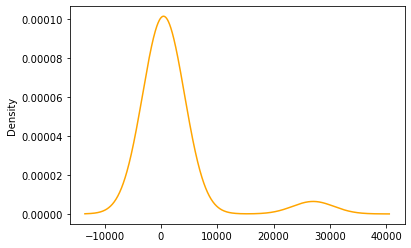

In [9]:
# Visualize the value counts of APPLICATION_TYPE
type_counts.plot.density(color = 'orange')

In [10]:
# Filter Dataset by overweighted values.
split_df_t3 = application_df[application_df['APPLICATION_TYPE']=='T3']
split_df_other = application_df[application_df['APPLICATION_TYPE']!='T3']
len(split_df_other)

7262

In [11]:
# Look at APPLICATION_TYPE value counts for binning
split_type_count = split_df_other.APPLICATION_TYPE.value_counts()
split_type_count

T4     1542
T6     1216
T5     1173
T19    1065
T8      737
T7      725
T10     528
T9      156
T13      66
T12      27
T2       16
T25       3
T14       3
T29       2
T15       2
T17       1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

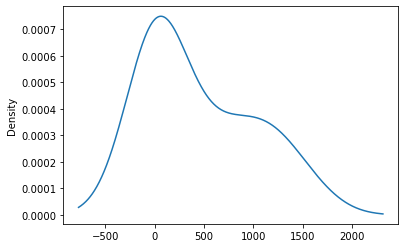

In [12]:
split_type_count.plot.density()

In [13]:
# Replace values with less than 500 total count like before.

replace_split = list(split_type_count[split_type_count < 500].index)

# Replace in dataframe
for app in replace_split:
    split_df_other.APPLICATION_TYPE = split_df_other.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
split_df_other.APPLICATION_TYPE.value_counts()

/var/folders/gr/rdqxw53x675gmt71ycftc7_m0000gn/T/ipykernel_82011/2056534770.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split_df_other.APPLICATION_TYPE = split_df_other.APPLICATION_TYPE.replace(app,"Other")


T4       1542
T6       1216
T5       1173
T19      1065
T8        737
T7        725
T10       528
Other     276
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Look at CLASSIFICATION value counts for binning
split_class_type_count = split_df_other.CLASSIFICATION.value_counts()
split_class_type_count

C1000    4417
C3000    1888
C2000     885
C1300      51
C1200      12
C4000       6
C5000       2
C0          1
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

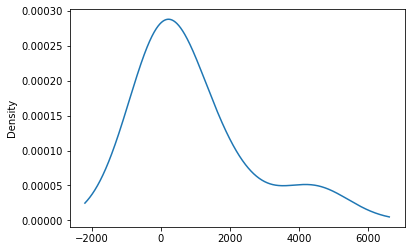

In [15]:
# Visualize the value counts of CLASSIFICATION
split_class_type_count.plot.density()

In [16]:
# Generate our categorical variable lists
application_cat = split_df_other.dtypes[split_df_other.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(split_df_other[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,NAME_146TH ALUMNI ASSOCIATION,NAME_150TH INTELLIGENCE SQUADRON ENLISTED ADVISORY COUNCIL,NAME_1999 VEBA OF THE NONREPRESENTED EMPLOYEES OF SOUTHERN CA EDISON,NAME_2618 COMMERCIAL DRIVE INVESTMENT GROUP LLC,NAME_2833 EXCHANGE CLUB OF BARTLETT TN,NAME_300 SWIM TEAM INC,NAME_3615 VFW AUXILIARY TO PARNELL-BURT POST,NAME_4 VFW AUX TO DISTRICT DEPARTMENT OF OREGON,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
# Merge one-hot encoded features and drop the originals
merged_df = split_df_other.merge(encode_df,on=split_df_other.index).drop(columns=application_cat)
merged_df

,key_0,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,NAME_146TH ALUMNI ASSOCIATION,NAME_150TH INTELLIGENCE SQUADRON ENLISTED ADVISORY COUNCIL,NAME_1999 VEBA OF THE NONREPRESENTED EMPLOYEES OF SOUTHERN CA EDISON,NAME_2618 COMMERCIAL DRIVE INVESTMENT GROUP LLC,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N
0,0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,8,1,94389,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,9,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,20,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7257,34291,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7258,34292,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7259,34294,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7260,34295,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
# Split our preprocessed data into our features and target arrays

X= merged_df.drop(columns='IS_SUCCESSFUL')
y= merged_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=52)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 20



nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim=number_input_features, activation='relu')
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu')
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu')
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                235280    
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 238,351
Trainable params: 238,351
Non-trainable params: 0
_________________________________________________________________


2023-02-02 18:01:36.338014: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
# Compile the model
nn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [23]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames.
os.makedirs("checkpoints/", exist_ok = True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [24]:
# Create a callback every five epochs
callback = ModelCheckpoint(
    filepath = checkpoint_path,
    verbose = 1,
    save_weights_only = True,
    save_freq = 'epoch')

In [25]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs = 50, callbacks = [callback])

Epoch 1/50
166/171 [============================>.] - ETA: 0s - loss: 0.4968 - accuracy: 0.7671
Epoch 1: saving model to checkpoints/weights.01.hdf5
171/171 [==============================] - 2s 7ms/step - loss: 0.4944 - accuracy: 0.7683
Epoch 2/50
162/171 [===========================>..] - ETA: 0s - loss: 0.2292 - accuracy: 0.9097
Epoch 2: saving model to checkpoints/weights.02.hdf5
171/171 [==============================] - 1s 6ms/step - loss: 0.2278 - accuracy: 0.9106
Epoch 3/50
169/171 [============================>.] - ETA: 0s - loss: 0.1558 - accuracy: 0.9377
Epoch 3: saving model to checkpoints/weights.03.hdf5
171/171 [==============================] - 1s 6ms/step - loss: 0.1561 - accuracy: 0.9376
Epoch 4/50
167/171 [============================>.] - ETA: 0s - loss: 0.1400 - accuracy: 0.9379
Epoch 4: saving model to checkpoints/weights.04.hdf5
171/171 [==============================] - 1s 5ms/step - loss: 0.1411 - accuracy: 0.9378
Epoch 5/50
163/171 [===========================>

164/171 [===========================>..] - ETA: 0s - loss: 0.0975 - accuracy: 0.9590
Epoch 35: saving model to checkpoints/weights.35.hdf5
171/171 [==============================] - 1s 5ms/step - loss: 0.0974 - accuracy: 0.9589
Epoch 36/50
169/171 [============================>.] - ETA: 0s - loss: 0.0985 - accuracy: 0.9575
Epoch 36: saving model to checkpoints/weights.36.hdf5
171/171 [==============================] - 1s 6ms/step - loss: 0.0982 - accuracy: 0.9576
Epoch 37/50
167/171 [============================>.] - ETA: 0s - loss: 0.0956 - accuracy: 0.9592
Epoch 37: saving model to checkpoints/weights.37.hdf5
171/171 [==============================] - 1s 6ms/step - loss: 0.0959 - accuracy: 0.9589
Epoch 38/50
166/171 [============================>.] - ETA: 0s - loss: 0.0944 - accuracy: 0.9610
Epoch 38: saving model to checkpoints/weights.38.hdf5
171/171 [==============================] - 1s 5ms/step - loss: 0.0943 - accuracy: 0.9607
Epoch 39/50
167/171 [============================>.]

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

57/57 - 0s - loss: 0.8405 - accuracy: 0.8199 - 301ms/epoch - 5ms/step
Loss: 0.8405275344848633, Accuracy: 0.8199338912963867


In [27]:
# Export the model to a HDF5 file
nn.save("AlphabetSoupCharity_Optimization3.h5")